In [1]:
import os, glob
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

image_path = "images"
data_path = "data"
file_name = "italy_wikipedia.xlsx"

today = datetime.date.today().strftime("%Y%m%d")

In [2]:
df_data_wide = pd.read_excel(data_path + "/" + file_name, sheet_name="Wide", index_col='Date',
                             parse_dates=['Date'], dayfirst=True)
df_data_wide.head()

,VDA_Confirmed,VDA_Deaths,LIG_Confirmed,LIG_Deaths,PIE_Confirmed,PIE_Deaths,LOM_Confirmed,LOM_Deaths,VEN_Confirmed,VEN_Deaths,...,SAR_Confirmed,SAR_Deaths,Confirmed_New,Confirmed_Total,Deaths_New,Deaths_Total,Active_ICU,Active_Total,Recovered,Tested
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,0,0,0,2,0,0
2020-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,0,0,3,0,0
2020-02-21,0,0,0,0,0,0,15,0,2,1,...,0,0,17,20,1,1,0,19,0,0
2020-02-22,0,0,0,0,1,0,40,1,16,0,...,0,0,59,79,1,2,18,75,0,0
2020-02-23,0,0,0,0,2,0,57,1,7,0,...,0,0,71,150,1,3,25,147,0,0


In [3]:
df_data_wide = df_data_wide.loc[:,['Confirmed_New', 'Confirmed_Total', 'Deaths_New', 'Deaths_Total',
                                   'Active_ICU', 'Active_Total', 'Recovered', 'Tested']]
df_data_wide['Growth_Rate'] = df_data_wide['Confirmed_New'].divide(df_data_wide['Active_Total'])

df_data_wide['SMA3_confirmed'] = df_data_wide["Confirmed_Total"].rolling(3).mean()
df_data_wide['SMA10_confirmed'] = df_data_wide["Confirmed_Total"].rolling(10).mean()
df_data_wide['SMA3_deaths'] = df_data_wide["Deaths_Total"].rolling(3).mean()
df_data_wide['SMA10_deaths'] = df_data_wide["Deaths_Total"].rolling(10).mean()
df_data_wide['SMA3_active'] = df_data_wide["Active_Total"].rolling(3).mean()
df_data_wide['SMA10_active'] = df_data_wide["Active_Total"].rolling(10).mean()
df_data_wide['SMA3_growth'] = df_data_wide["Growth_Rate"].rolling(3).mean()
df_data_wide['SMA10_growth'] = df_data_wide["Growth_Rate"].rolling(10).mean()

df_data_wide.head()

,Confirmed_New,Confirmed_Total,Deaths_New,Deaths_Total,Active_ICU,Active_Total,Recovered,Tested,Growth_Rate,SMA3_confirmed,SMA10_confirmed,SMA3_deaths,SMA10_deaths,SMA3_active,SMA10_active,SMA3_growth,SMA10_growth
Date,,,,,,,,,,,,,,,,,
2020-01-31,2,2,0,0,0,2,0,0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-06,1,3,0,0,0,3,0,0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21,17,20,1,1,0,19,0,0,0.894737,8.333333,NaN,0.333333,NaN,8.000000,NaN,0.742690,NaN
2020-02-22,59,79,1,2,18,75,0,0,0.786667,34.000000,NaN,1.000000,NaN,32.333333,NaN,0.671579,NaN
2020-02-23,71,150,1,3,25,147,0,0,0.482993,83.000000,NaN,2.000000,NaN,80.333333,NaN,0.721466,NaN


In [4]:
df_data_long = pd.read_excel(data_path + "/italy_wikipedia.xlsx", sheet_name="Long", index_col='Region',
                             parse_dates=['Date'], dayfirst=True)
df_data_long['SMA3_confirmed'] = df_data_long.groupby(level='Region')["Confirmed"].rolling(3).mean().values
df_data_long['SMA10_confirmed'] = df_data_long.groupby(level='Region')["Confirmed"].rolling(10).mean().values
df_data_long['SMA3_deaths'] = df_data_long.groupby(level='Region')["Deaths"].rolling(3).mean().values
df_data_long['SMA10_deaths'] = df_data_long.groupby(level='Region')["Deaths"].rolling(10).mean().values

df_data_long.head()

,Date,Confirmed,Deaths,SMA3_confirmed,SMA10_confirmed,SMA3_deaths,SMA10_deaths
Region,,,,,,,
Abruzzo,2020-01-31,0,0,NaN,NaN,NaN,NaN
Abruzzo,2020-02-06,0,0,NaN,NaN,NaN,NaN
Abruzzo,2020-02-21,0,0,0.0,NaN,0.0,NaN
Abruzzo,2020-02-22,0,0,0.0,NaN,0.0,NaN
Abruzzo,2020-02-23,0,0,0.0,NaN,0.0,NaN


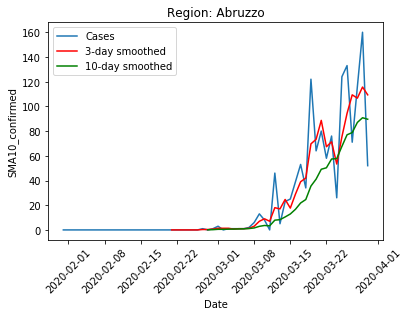

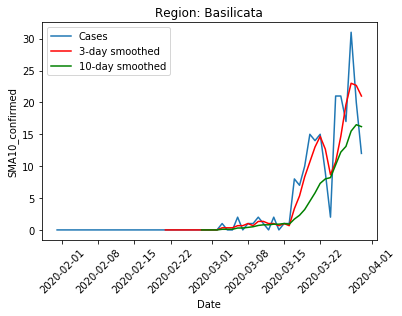

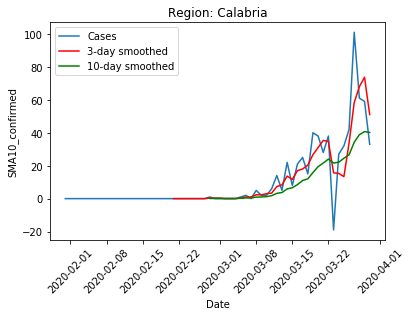

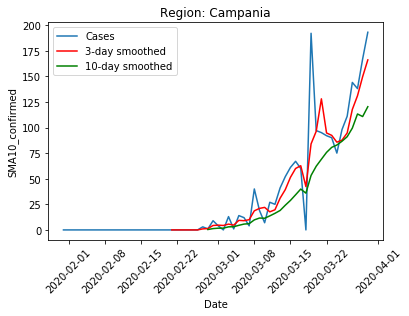

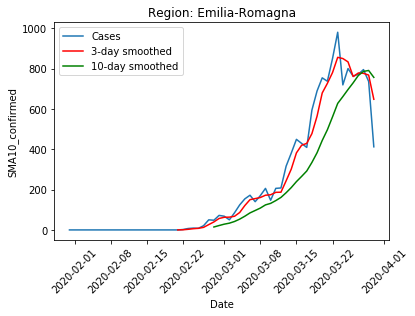

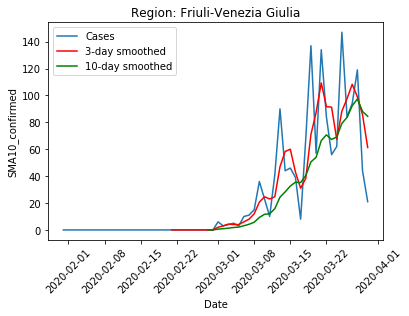

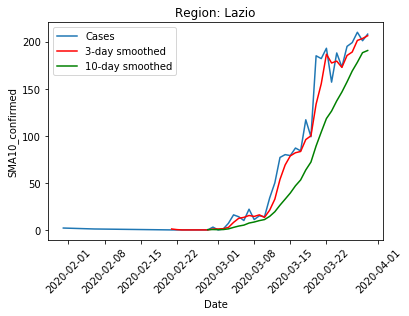

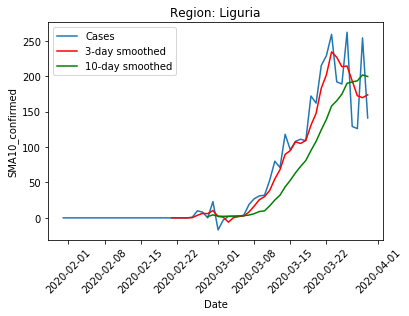

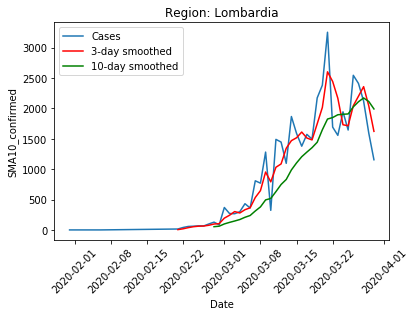

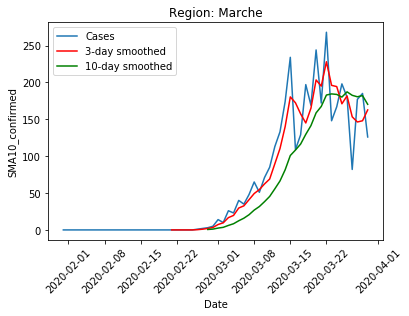

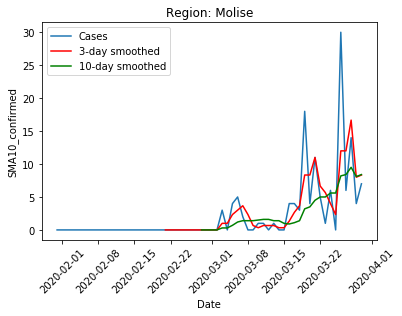

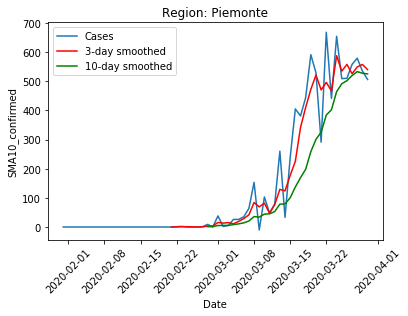

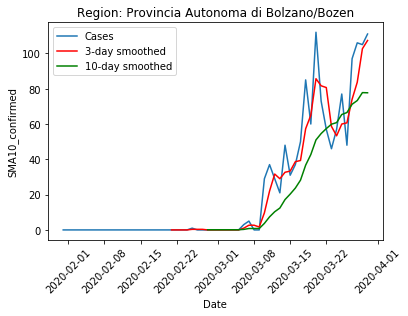

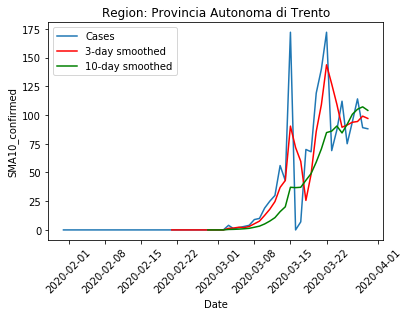

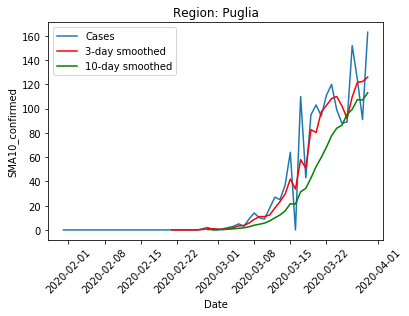

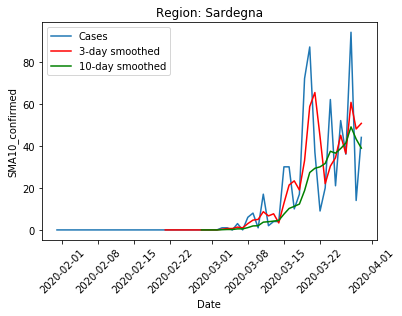

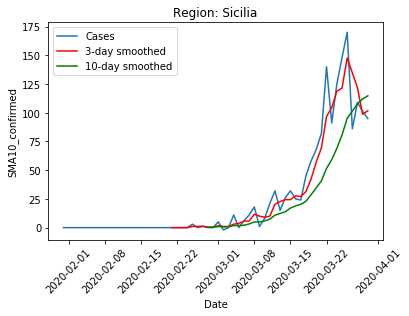

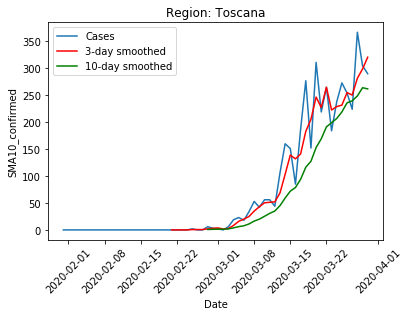

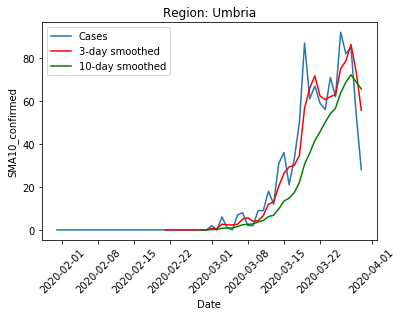

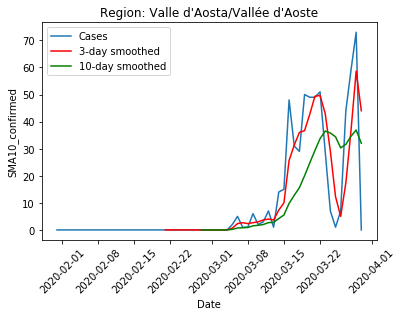

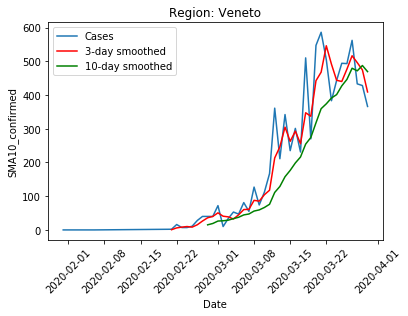

In [5]:
regions_to_plot = df_data_long.index.unique()

for region in regions_to_plot:
    fig, ax = plt.subplots()
    sns.lineplot('Date', 'Confirmed', data=df_data_long.loc[region], ax=ax, label='Cases')
    sns.lineplot('Date', 'SMA3_confirmed', data=df_data_long.loc[region], ax=ax, color='red', label='3-day smoothed')
    sns.lineplot('Date', 'SMA10_confirmed', data=df_data_long.loc[region], ax=ax, color='green', label='10-day smoothed')
    plt.title(f"Region: {region}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    if "/" in region:
        region = region.replace("/", "-")
    
    fig.savefig(image_path + f"/per_region/{region}_confirmed_cases_trend_{today}.png")

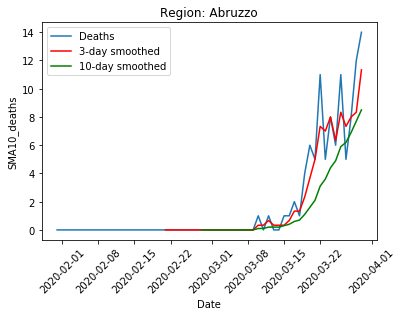

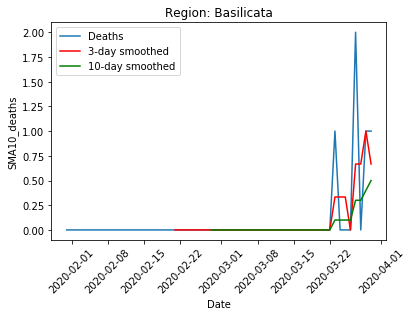

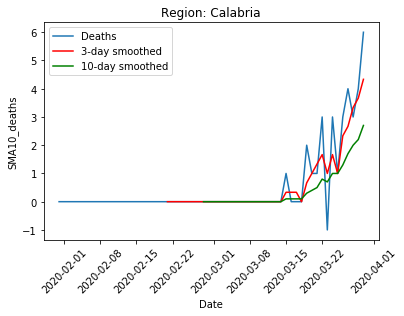

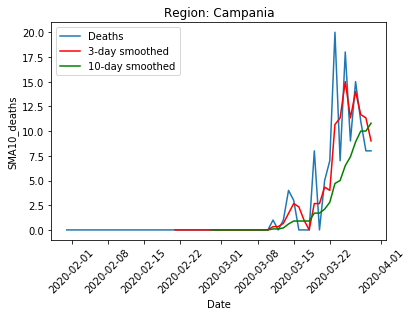

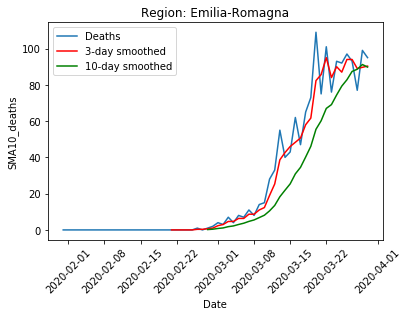

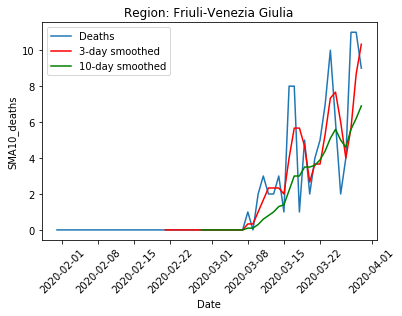

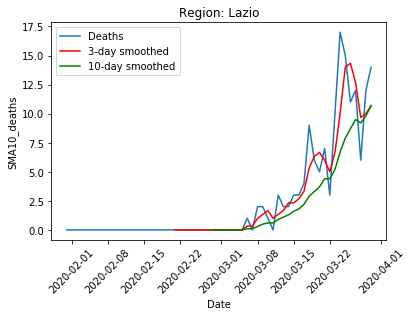

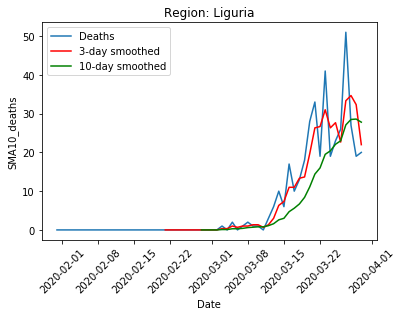

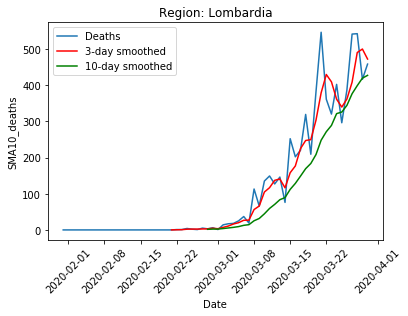

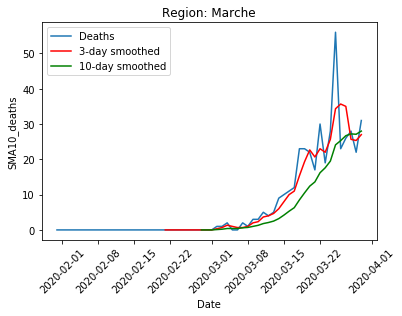

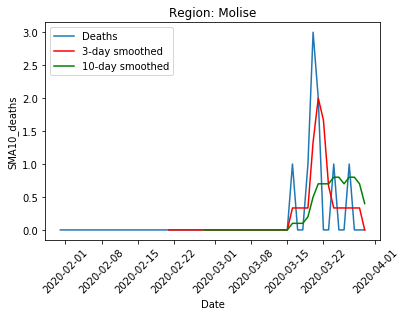

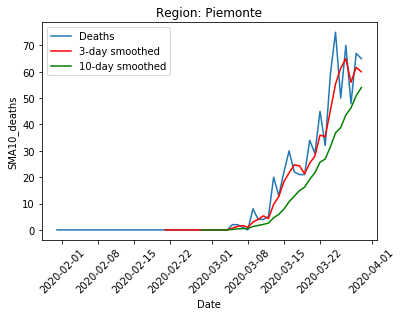

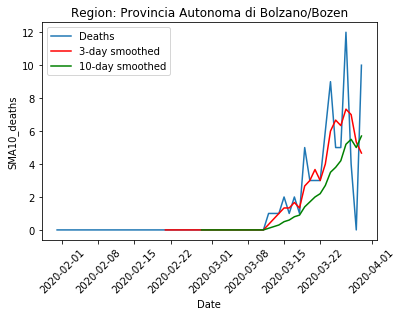

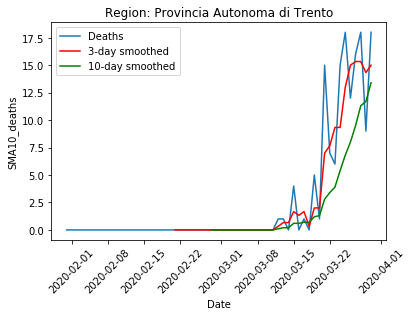

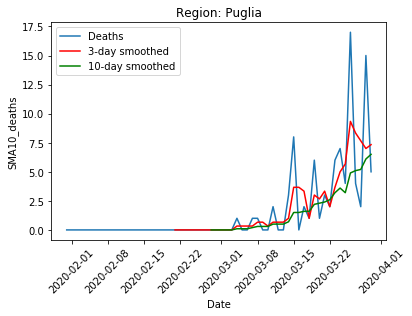

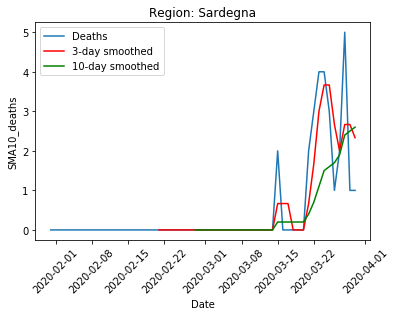

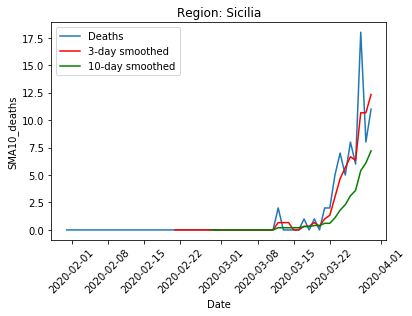

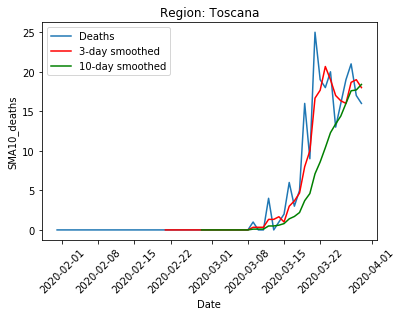

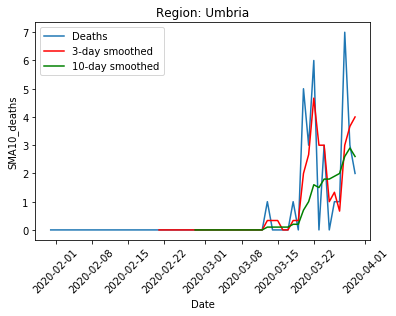

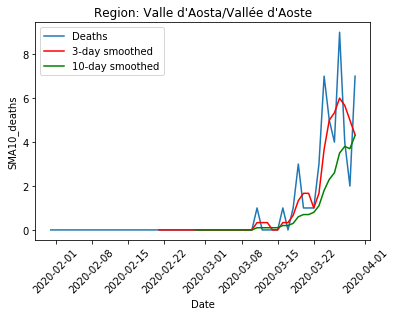

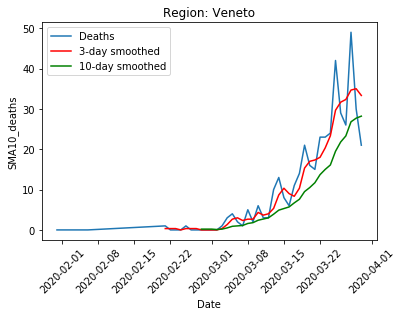

In [6]:
for region in regions_to_plot:
    fig, ax = plt.subplots()
    sns.lineplot('Date', 'Deaths', data=df_data_long.loc[region], ax=ax, label='Deaths')
    sns.lineplot('Date', 'SMA3_deaths', data=df_data_long.loc[region], ax=ax, color='red', label='3-day smoothed')
    sns.lineplot('Date', 'SMA10_deaths', data=df_data_long.loc[region], ax=ax, color='green', label='10-day smoothed')
    plt.title(f"Region: {region}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    if "/" in region:
        region = region.replace("/", "-")
    
    fig.savefig(image_path + f"/per_region/{region}_deaths_trend_{today}.png")

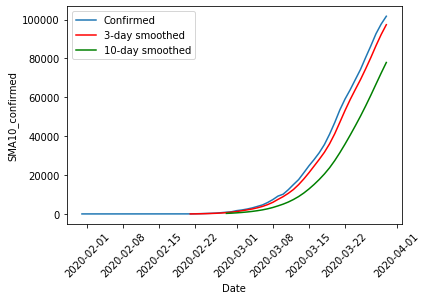

In [7]:
fig, ax = plt.subplots()
sns.lineplot('Date', 'Confirmed_Total', data=df_data_wide.reset_index(), ax=ax, label='Confirmed')
sns.lineplot('Date', 'SMA3_confirmed', data=df_data_wide.reset_index(), ax=ax, color='red', label='3-day smoothed')
sns.lineplot('Date', 'SMA10_confirmed', data=df_data_wide.reset_index(), ax=ax, color='green', label='10-day smoothed')
plt.xticks(rotation=45)
plt.legend()
plt.show()
fig.savefig(image_path + f"/confirmed_cases_trend_{today}.png")

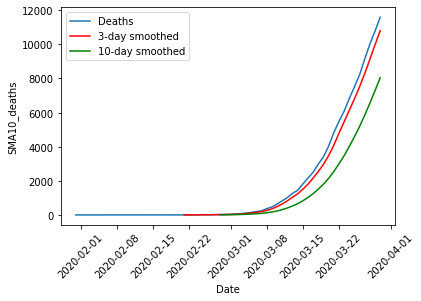

In [8]:
fig, ax = plt.subplots()
sns.lineplot('Date', 'Deaths_Total', data=df_data_wide.reset_index(), ax=ax, label='Deaths')
sns.lineplot('Date', 'SMA3_deaths', data=df_data_wide.reset_index(), ax=ax, color='red', label='3-day smoothed')
sns.lineplot('Date', 'SMA10_deaths', data=df_data_wide.reset_index(), ax=ax, color='green', label='10-day smoothed')
plt.xticks(rotation=45)
plt.legend()
plt.show()
fig.savefig(image_path + f"/deaths_trend_{today}.png")

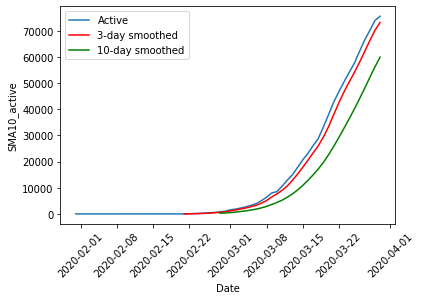

In [9]:
fig, ax = plt.subplots()
sns.lineplot('Date', 'Active_Total', data=df_data_wide.reset_index(), ax=ax, label='Active')
sns.lineplot('Date', 'SMA3_active', data=df_data_wide.reset_index(), ax=ax, color='red', label='3-day smoothed')
sns.lineplot('Date', 'SMA10_active', data=df_data_wide.reset_index(), ax=ax, color='green', label='10-day smoothed')
plt.xticks(rotation=45)
plt.legend()
plt.show()
fig.savefig(image_path + f"/active_cases_trend_{today}.png")

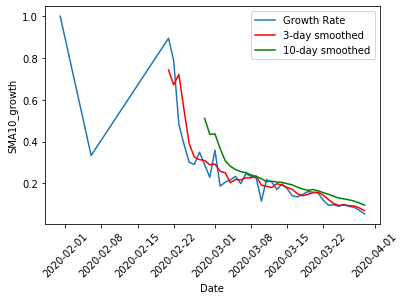

In [10]:
fig, ax = plt.subplots()
sns.lineplot('Date', 'Growth_Rate', data=df_data_wide.reset_index(), ax=ax, label='Growth Rate')
sns.lineplot('Date', 'SMA3_growth', data=df_data_wide.reset_index(), ax=ax, color='red', label='3-day smoothed')
sns.lineplot('Date', 'SMA10_growth', data=df_data_wide.reset_index(), ax=ax, color='green', label='10-day smoothed')
plt.xticks(rotation=45)
plt.legend()
plt.show()
fig.savefig(image_path + f"/growth_rate_trend_{today}.png")